Final Plots

Import libraries for project and change display option for any floats

In [751]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

#supress scientific notation (show full number)
pd.options.display.float_format = '{:.0f}'.format

Read in final dataframe for plotting and analysis

In [752]:
mlb_dataset = pd.read_csv(r'cleansed_data\attend_wins_payroll.csv')

mlb_dataset.head()

,Year,Team,Games Played,Wins,Total Payroll,Attendance,Avg Att
0,2023,Arizona Diamondbacks,162,84,112763571,1961182,24212
1,2022,Arizona Diamondbacks,162,74,75993333,1605199,19817
2,2021,Arizona Diamondbacks,162,52,89077233,1043010,12876
3,2023,Atlanta Braves,162,104,199727500,3191505,39401
4,2022,Atlanta Braves,162,101,173935000,3129931,38641


Create a few columns based of calculations of dataframe for analysis

In [753]:
#create cost per win column
mlb_dataset['Cost Per Win'] = mlb_dataset['Total Payroll'] / mlb_dataset['Wins'].astype(int)
#create cost per fan column
mlb_dataset['Cost Per Fan'] = mlb_dataset['Total Payroll'] / mlb_dataset['Attendance'].astype(int)

mlb_dataset.head()

,Year,Team,Games Played,Wins,Total Payroll,Attendance,Avg Att,Cost Per Win,Cost Per Fan
0,2023,Arizona Diamondbacks,162,84,112763571,1961182,24212,1342423,57
1,2022,Arizona Diamondbacks,162,74,75993333,1605199,19817,1026937,47
2,2021,Arizona Diamondbacks,162,52,89077233,1043010,12876,1713024,85
3,2023,Atlanta Braves,162,104,199727500,3191505,39401,1920457,63
4,2022,Atlanta Braves,162,101,173935000,3129931,38641,1722129,56


The first plot to create will be an overview of the average total payroll for each team over the past 3 years

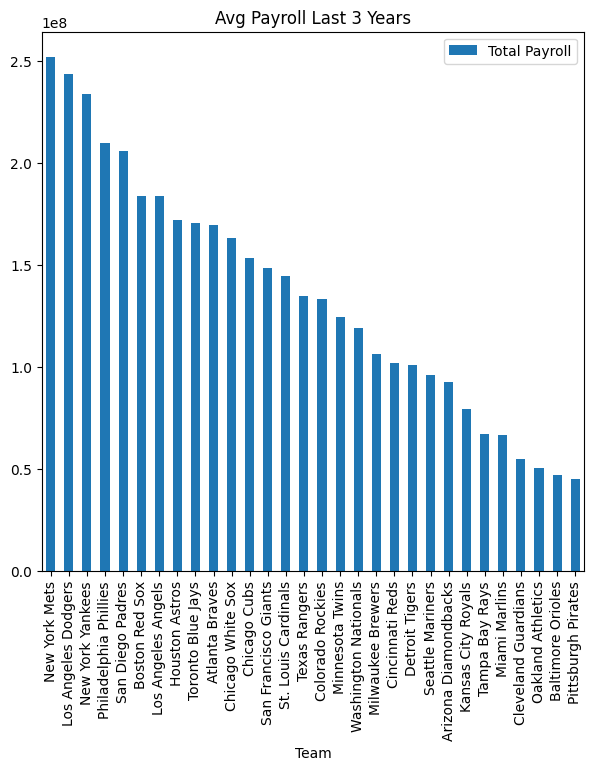

In [754]:
#create variable containing mean Total Payroll by team. This will include 3 years as it will take the team values over that times and find the mean
top_payroll = mlb_dataset.groupby(['Team'])['Total Payroll'].mean()
#turn the variable into a DF for use
top_payroll = top_payroll.to_frame()
#sort values for cleaner plot
top_payroll.sort_values(by='Total Payroll',ascending=False, inplace=True)

#plot average payroll over past 3 years
plot_top_payroll = top_payroll.plot(kind='bar', title='Avg Payroll Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

From these results we can see the NY Mets spend the most money over the last 3 years, and the Pittsburgh Pirates spend the least.
This is interesting information, but does not yet measure any kind of success. Just money spent.

To find one more measure of success, we can find the mean win total for the past 3 years as well.

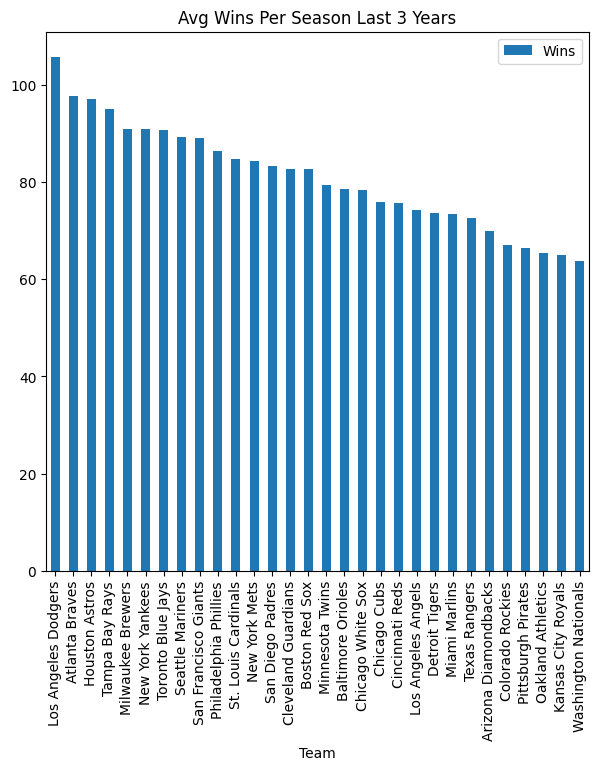

In [755]:
#create variable containing mean wins per year by team. This will include 3 years as it will take the team values over that times and find the mean
avg_wins_3seasons = mlb_dataset.groupby(['Team'])['Wins'].mean()
#turn the variable into a DF for use
avg_wins_3seasons = avg_wins_3seasons.to_frame()
#sort values for cleaner plot
avg_wins_3seasons.sort_values(by='Wins',ascending=False, inplace=True)

#Plot mean wins per year over last 3 years
plot_avg_wins = avg_wins_3seasons.plot(kind='bar', title='Avg Wins Per Season Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

The results are also a good look at team success over 3 years, the LA Dodgers have a pretty solid lead over everyone else with regular season success.

Now we can create a scatter plot with the Total Payoll and Wins to see if there are any trends bewteen the two.

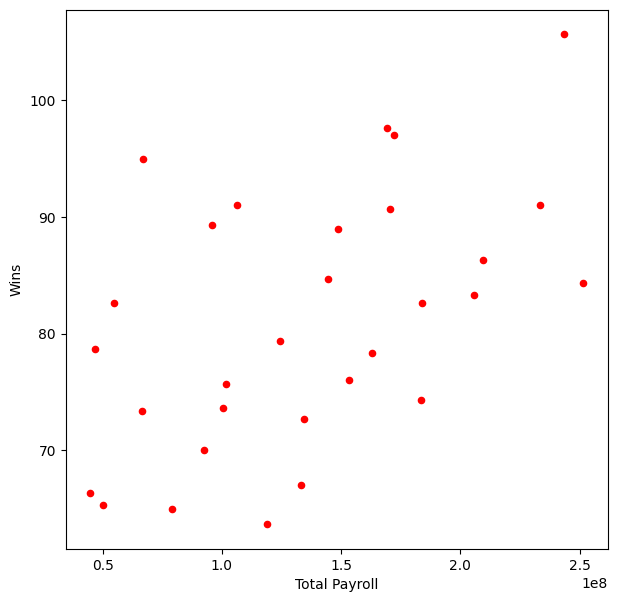

In [756]:
#merge the 2 DF created above to create plot
cost_wins = pd.merge(top_payroll, avg_wins_3seasons, on=['Team'])

#create scatterplot 
fig, ax = plt.subplots(figsize=(7, 7))
cost_wins.plot('Total Payroll', 'Wins', kind='scatter', ax=ax, c='red')

plt.show()

There does not appear to be an overwhelming relationship bewteen the payroll of a team and their wins. 
It shows that over a 3 years period much goes into a teams success than simply payroll. While getting the highest paid talent can set a team up for success, other factors like injuries, team chemistry, and just luck play a factor in a team's onfield success.

Let's plot the teamnames to see which teams have been the best on the field and the ones willing to spend.

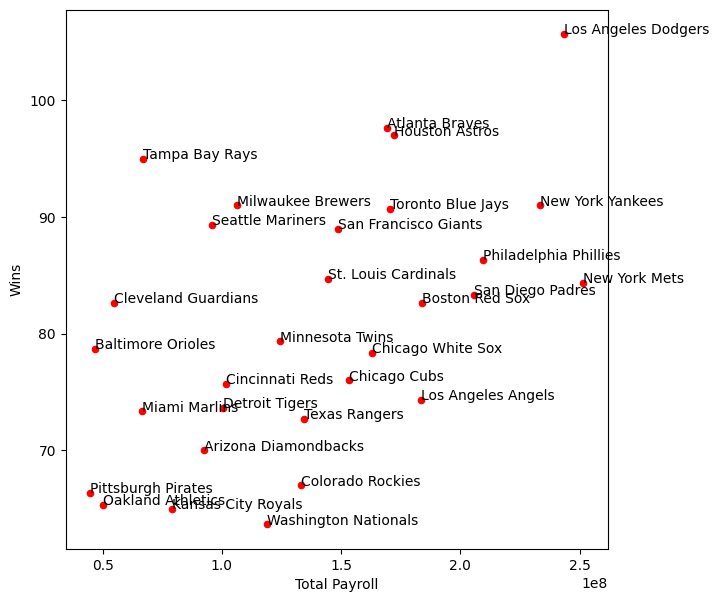

In [757]:
#add team names to scatterplot
fig, ax = plt.subplots(figsize=(7, 7))
cost_wins.plot('Total Payroll', 'Wins', kind='scatter', ax=ax, c='red')
for k, v in cost_wins.iterrows():
    ax.annotate(k, v)

plt.show()

Next I will plot the relatioship between a team's payroll and attendance. 
This will attempt to show if higher spending teams have more fans show up for the games. 

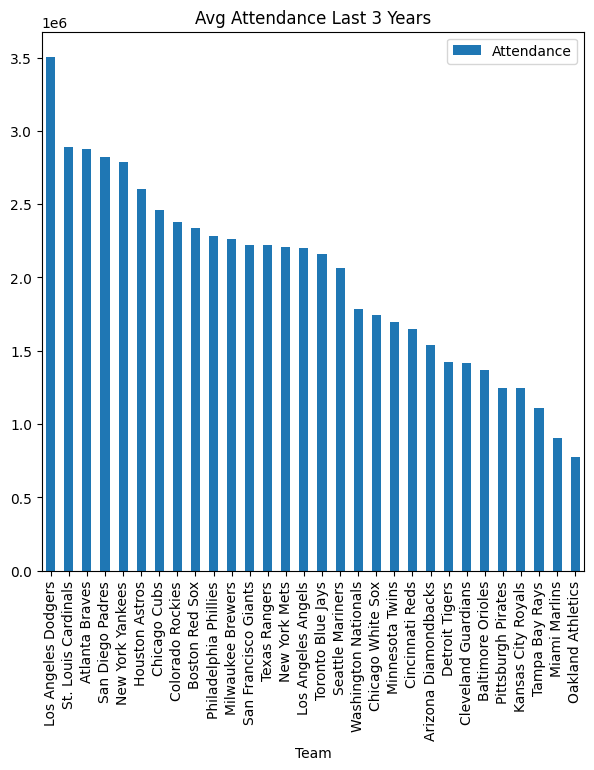

In [758]:
#create variable containing mean Attendance by team. This will include 3 years as it will take the team values over that times and find the mean
mlb_attendance = mlb_dataset.groupby(['Team'])['Attendance'].mean()
#turn the variable into a DF for use
mlb_attendance = mlb_attendance.to_frame()
#sort values for cleaner graph
mlb_attendance.sort_values(by='Attendance', ascending=False, inplace=True)

#plot average attendance over past 3 years
plot_mlb_attendance = mlb_attendance.plot(kind='bar', title='Avg Attendance Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')


The Dodgers top a list again by a significant amount, while the Oakland Ateltics fans are apathetic with their impending move to Vegas. And Miami fans are just apathetic.

Bringing back the payroll graph from above, going to merge with attendance to see the influence 

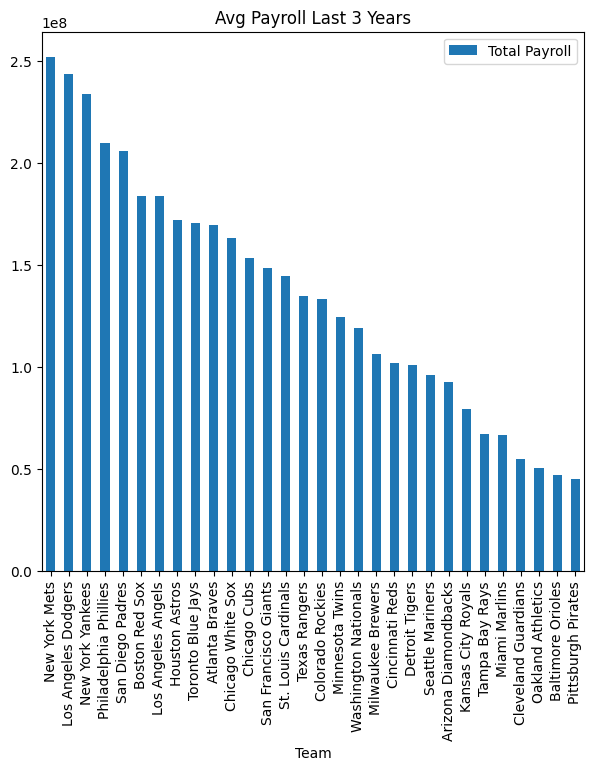

In [759]:
#bring back the top payroll graph to use with the attendance data
plot_top_payroll = top_payroll.plot(kind='bar', title='Avg Payroll Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

Merging the 2 DFs to plot

In [760]:
#merge the 2 DF created above to create plot
attendance_payroll = pd.merge(mlb_attendance, top_payroll, on=['Team'])

#reset index on new DF
attendance_payroll = attendance_payroll.reset_index() 


Create scatterplot

<Axes: xlabel='Attendance', ylabel='Total_Payroll'>

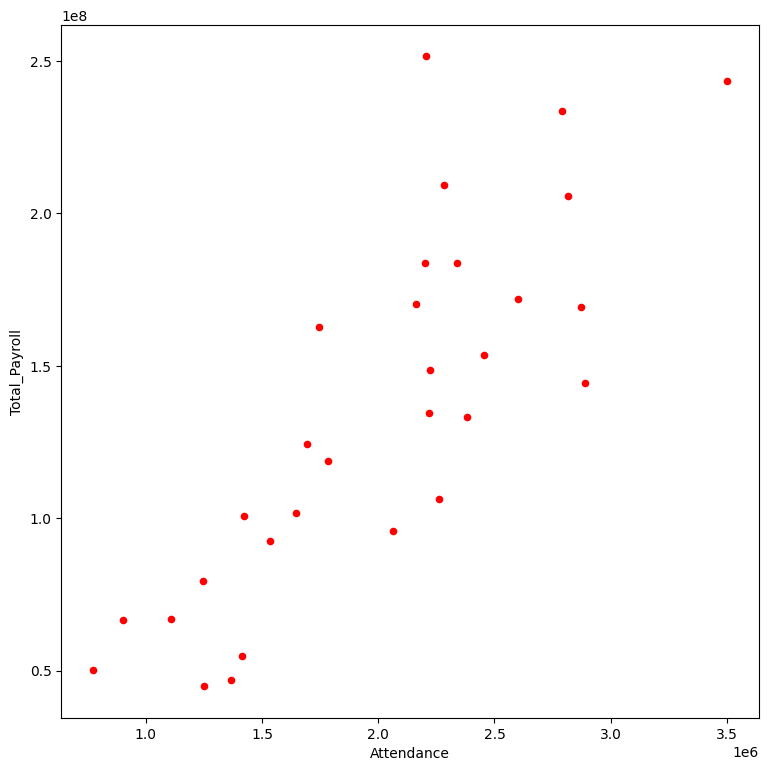

In [761]:
#Rename a column for ease of use in next steps
attendance_payroll = attendance_payroll.rename(columns={"Total Payroll": "Total_Payroll"})

#create scatter plot
fig, ax = plt.subplots(figsize=(9, 9))
attendance_payroll.plot('Attendance', 'Total_Payroll', kind='scatter', ax=ax, c='red')

It appears there may be at least a slight relationship bewteen spending money on players and fans showing up. While winning is the best way to get fans in the seats, it does not hurt to have ownership making an effort to make the team successful. Fans might respect that and make an effort to show up even during laskluster seasons. 

We can add the teams to see who has the most fans showing up over the past 3 years and how they spent for them. 

160

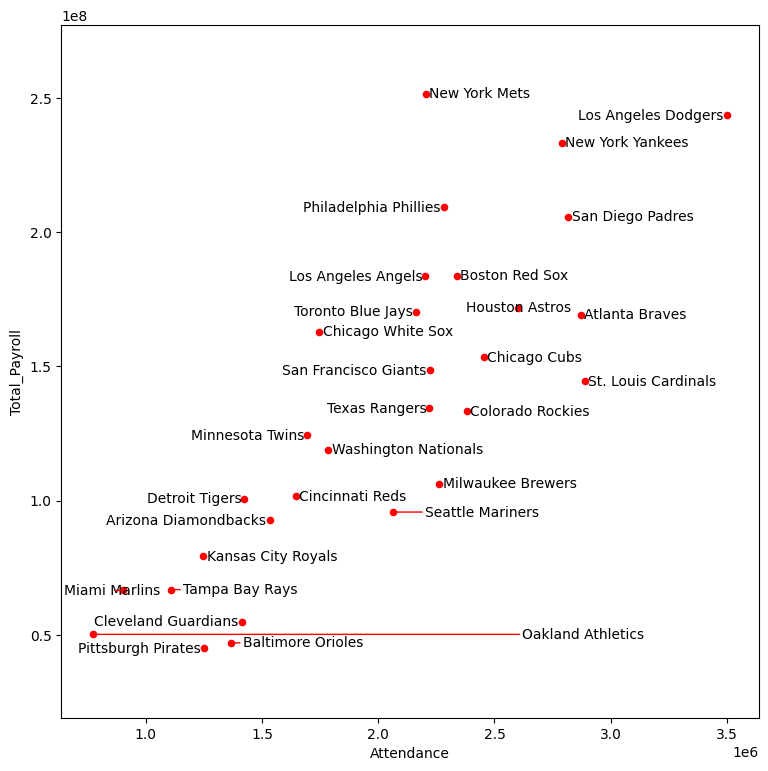

In [762]:
#create plot and add team names
fig, ax = plt.subplots(figsize=(9, 9))
attendance_payroll.plot('Attendance', 'Total_Payroll', kind='scatter', ax=ax, c='red')

texts = [plt.text(attendance_payroll.Attendance[i], attendance_payroll.Total_Payroll[i]+np.random.random()/100, str(attendance_payroll.Team[i])) for i in attendance_payroll.index]
plt.margins(y=0.125)
adjust_text(texts,
            force_text=(2, 2),
            arrowprops=dict(arrowstyle='-',color='red'),
            autoalign='x',
            only_move={'points':'x','text':'x'},
            )

The Dodgers seem to be the most successful team, based on wins and attendance. Though they do pay for it with the second highest payroll over the last 3 years. 
The Mets spent the most, and not had nearly the success. Oakland looks to be the worst. They don't win, they don't spend, and no one shows up. 

Graph new values calculated from dataframe

In [763]:
mlb_dataset.head()

,Year,Team,Games Played,Wins,Total Payroll,Attendance,Avg Att,Cost Per Win,Cost Per Fan
0,2023,Arizona Diamondbacks,162,84,112763571,1961182,24212,1342423,57
1,2022,Arizona Diamondbacks,162,74,75993333,1605199,19817,1026937,47
2,2021,Arizona Diamondbacks,162,52,89077233,1043010,12876,1713024,85
3,2023,Atlanta Braves,162,104,199727500,3191505,39401,1920457,63
4,2022,Atlanta Braves,162,101,173935000,3129931,38641,1722129,56


This will create a plot for averages of cost per win and cost per fan.


In [764]:
#create new variables that contain created values for plotting
cost_per_win_fan = mlb_dataset[['Team', 'Cost Per Win', 'Cost Per Fan']]
cost_per_win = cost_per_win_fan.groupby(['Team'])['Cost Per Win'].mean()
cost_per_fan = cost_per_win_fan.groupby(['Team'])['Cost Per Fan'].mean()

#turn variable to dataframes
cost_per_win = cost_per_win.to_frame()
cost_per_fan = cost_per_fan.to_frame()

#sort values for cleaner graph
cost_per_win.sort_values(by='Cost Per Win', ascending=False, inplace=True)
cost_per_fan.sort_values(by='Cost Per Fan', ascending=False, inplace=True)


Graph the 2 new dataframes

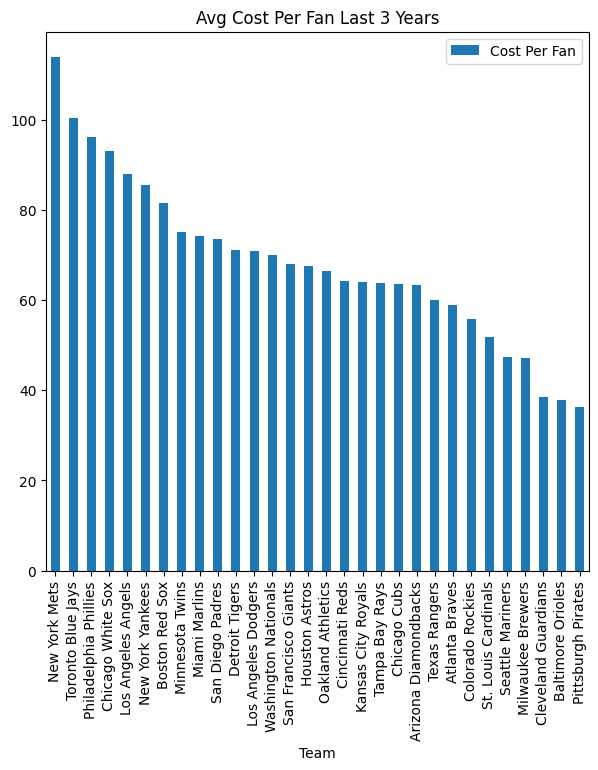

In [765]:
#plot average cost per fan over past 3 years
plot_cost_fan = cost_per_fan.plot(kind='bar', title='Avg Cost Per Fan Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

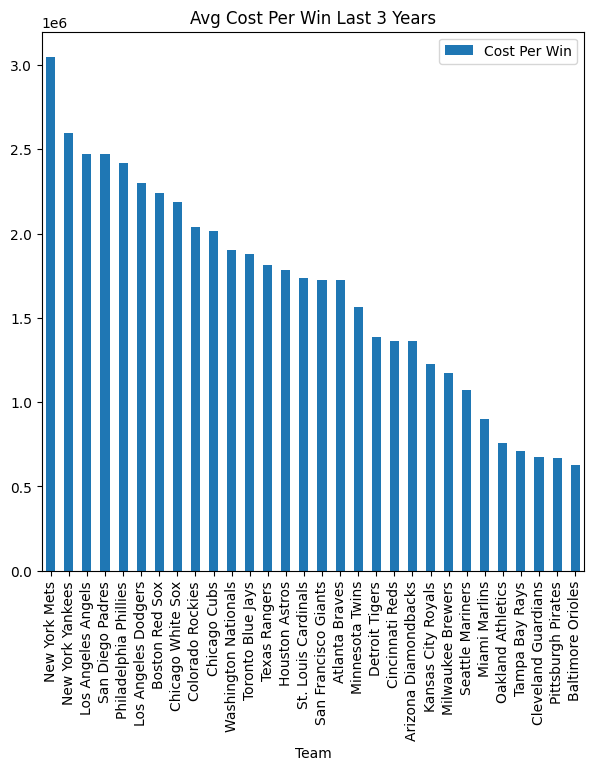

In [766]:
#plot average cost per win over past 3 years
plot_cost_win = cost_per_win.plot(kind='bar', title='Avg Cost Per Win Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')